<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/Clase2_Preprocesamiento_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## CLASE 2: EDA + Visualización + Preprocesamiento

In [ ]:
'''
En este ejercicio vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica

Vamos a realizar lo siguiente:

EDA: Explorar los datos
Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
Visualization
Pre-processing
¡Vamos a ello!
'''

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [3]:
df_seguro = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_seguros_sin_nulos.csv", sep=",")

In [ ]:
'''1. ESTRUCTURA DE DATOS '''

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro.head()
#la variable dependediente o la que queremos predecir es el precio del seguro

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
df_seguro.describe()

,EDAD,IMC,PESO,HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,1105.854260
std,14.049960,6.095439,16.389299,1.206345,1009.161649
min,18.000000,15.960000,43.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,5314.000000


In [ ]:
'''2. DETECCION DE NULOS'''

In [4]:
df_seguro.isnull().sum()
#sin nulos

EDAD                0
SEXO                0
IMC                 0
PESO                0
HIJOS               0
CIUDAD              0
PRECIO              0
INGRESO_SALARIAL    0
FUMADOR             0
TIPO_COCHE          0
dtype: int64

In [ ]:
'''3. VERIFICAMOS FILAS REPETIDAS'''

In [5]:
df_seguro[df_seguro.duplicated(keep=False)]
#sin repetidos

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE


In [ ]:
'''4. ANALISIS UNIVARIABLE'''

In [6]:
for i in df_seguro:
  print(i)

EDAD
SEXO
IMC
PESO
HIJOS
CIUDAD
PRECIO
INGRESO_SALARIAL
FUMADOR
TIPO_COCHE


In [ ]:
df_seguro["EDAD"].unique()

array([37, 25, 52, 23, 60, 34, 63, 18, 35, 24, 38, 58, 43, 31, 22, 45, 59,
       56, 30, 44, 26, 61, 20, 32, 42, 40, 47, 27, 41, 36, 64, 28, 53, 33,
       29, 50, 55, 49, 54, 46, 57, 48, 39, 21, 62, 51, 19])

In [7]:
#hacemos un distinc para echarle un vistazo
for i in df_seguro:
  print(i, df_seguro[i].unique(),'\n')

EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19] 

SEXO ['MASCULINO' 'FEMENINO'] 

IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.015 31

In [ ]:
'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

In [8]:
#función para devolver el nombre de la columna según el tipo de datos que es de las variables independientes
l_num = ["EDAD", "IMC", "PESO", "HIJOS"]
l_cat = ["SEXO", "CIUDAD","TIPO_COCHE"]
l_bool = ["FUMADOR"]

In [9]:
df_seguro2 = df_seguro.copy()

**EL OBJETIVO ES QUE TODOS LOS CAMPOS SEAN NUMERICOS** en principio

In [10]:
df_seguro2["FUMADOR_BOOL"] = df_seguro2["FUMADOR"].astype(int)

In [ ]:
df_seguro2.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE,FUMADOR_BOOL
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI,0
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI,0
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE,0
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA,0
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI,0


In [11]:
del(df_seguro2["FUMADOR"])

In [12]:
df_seguro2.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,AUDI,0
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,AUDI,0
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,SIN COCHE,0
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,TOYOTA,0
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,AUDI,0


In [13]:
df_seguro2["SEXO_BOOL"] = np.where((df_seguro2["SEXO"]=="MASCULINO"),0,1)

In [14]:
df_seguro2.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,AUDI,0,1


In [ ]:
df_seguro2["SEXO"].value_counts()

In [52]:
del(df_seguro2["SEXO"])

In [57]:
df_seguro2["SEXO_BOOL"].value_counts()

0    678
1    660
Name: SEXO_BOOL, dtype: int64

In [58]:
#descubrimos el tpo de dato
df_seguro2["CIUDAD"].dtype.kind

'O'

In [59]:
len(df_seguro2["EDAD"].unique())

47

In [60]:
target = ["PRECIO"] #excliomos la variable dependiente
def obtener_lista_variables(dataset):
  lista_num=[]
  lista_bool=[]
  lista_cat=[]

  for i in dataset:
    if(dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and len(dataset[i].unique()) != 2 and i not in target:
        lista_num.append(i)
    elif(dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and len(dataset[i].unique()) == 2 and i not in target:
      lista_bool.append(i)
    elif dataset[i].dtype.kind == "O" and i not in target:
      lista_cat.append(i)

  return lista_num, lista_bool, lista_cat

In [61]:
lnum, lbool, lcat = obtener_lista_variables(df_seguro2)

In [28]:
lnum

['EDAD', 'IMC', 'PESO', 'HIJOS']

In [31]:
lbool

['FUMADOR_BOOL', 'SEXO_BOOL']

In [62]:
lcat

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
'''6. LOGICA DE LAS VARIABLES'''

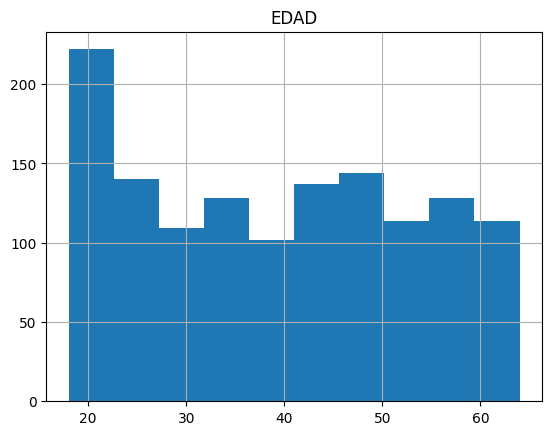

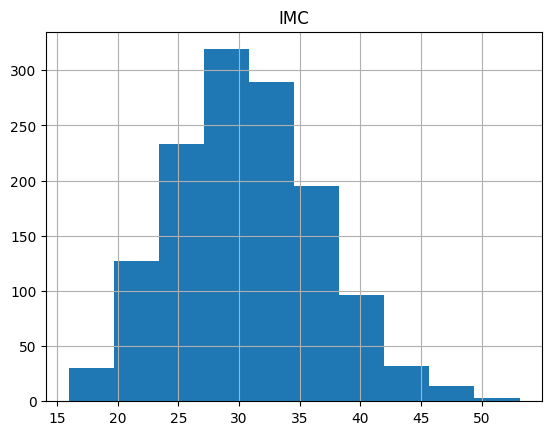

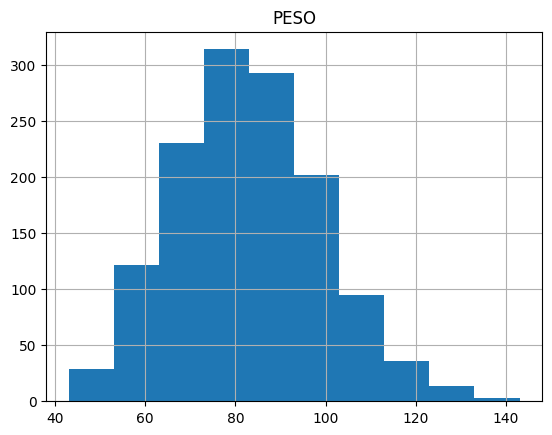

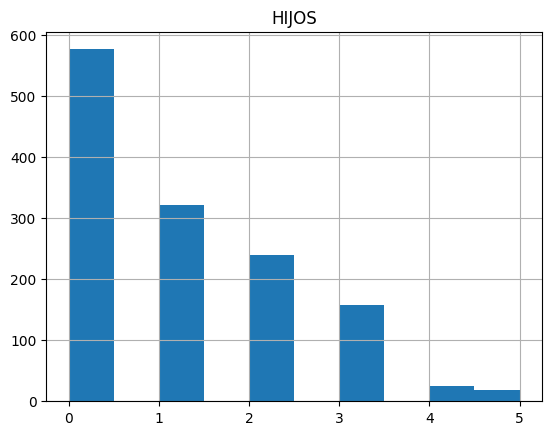

In [47]:
for i in lnum:
  df_seguro2.hist(i)

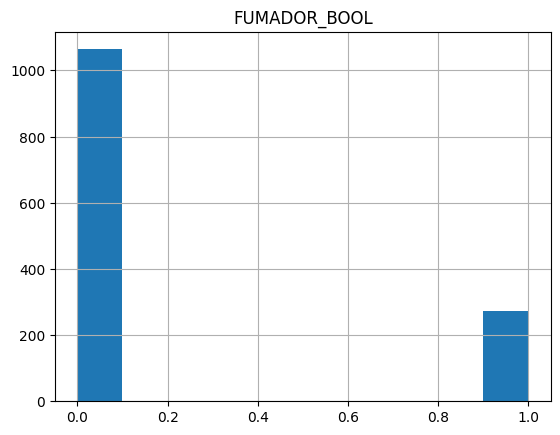

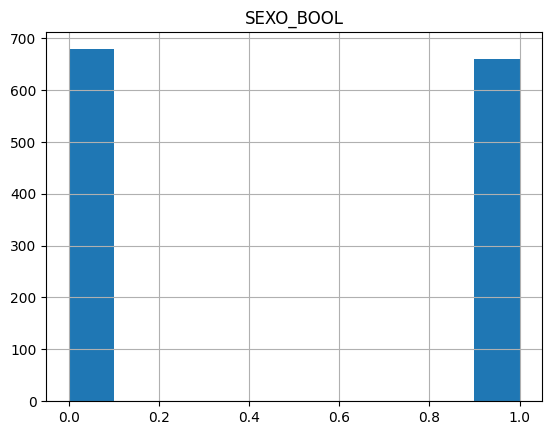

In [48]:
for i in lbool:
  df_seguro2.hist(i)

In [63]:
for i in lcat:
  print(df_seguro2.value_counts(i))

CIUDAD
MADRID       364
SEVILLA      325
VALENCIA     325
BARCELONA    324
dtype: int64
INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
dtype: int64
TIPO_COCHE
AUDI         249
SIN COCHE    228
TOYOTA       228
FIAT         213
KIA          210
SEAT         210
dtype: int64


In [64]:
df_seguro3 = df_seguro2.copy()

In [ ]:
'''7. PREPROCESAMIENTO'''

In [ ]:
'''7.1 CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'''


In [65]:
#HAcemos correlaciones de los numeros
corr = df_seguro3.corr(numeric_only=True)

In [66]:
corr

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


In [68]:
corr.style.background_gradient(cmap="coolwarm")
#cuanto más cerca del 1 más correlacionadas estan las variables

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


In [69]:
#Como el peso y el IMC tienen un significado parecido y una correlación similar, eliminamos una de los 2 por ejemplo el peso.
del(df_seguro3["PESO"])

In [70]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1


In [ ]:
'''7.2 ANALISIS DEL TARGET'''

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

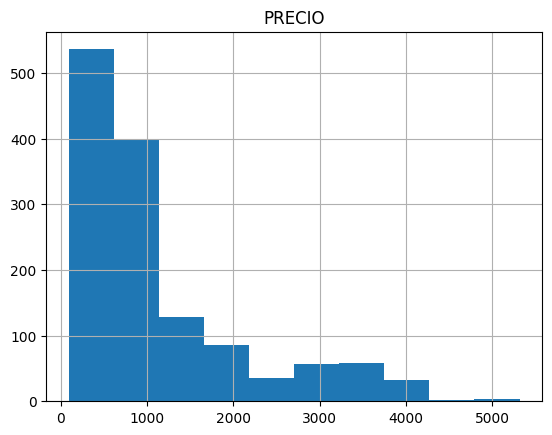

In [71]:
df_seguro3.hist("PRECIO")
#hay que trasnformarlo a normal

<Axes: xlabel='PRECIO'>

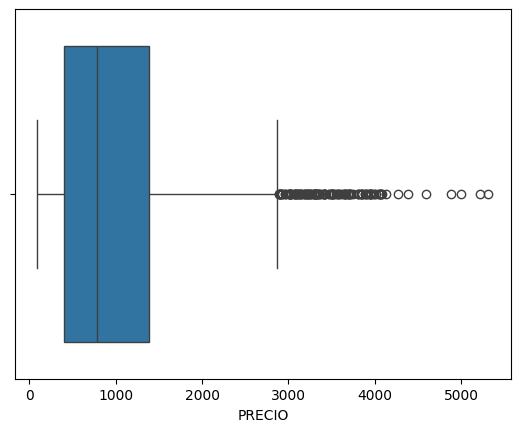

In [72]:
sns.boxplot(x=df_seguro3["PRECIO"])

In [74]:
#Normalizamos el precio para entrenar el modelo también con una distrbución de precios normal
df_seguro3["LOG_PRECIO"] = np.log10(df_seguro3["PRECIO"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

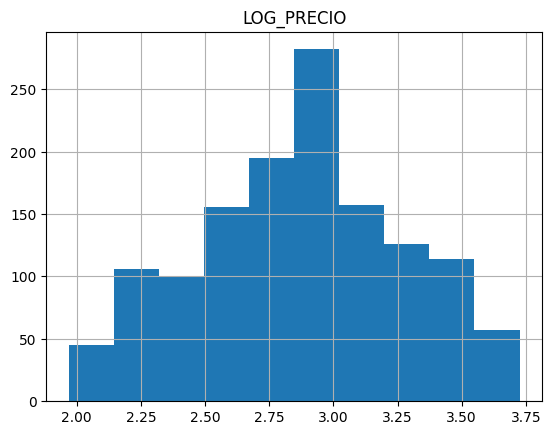

In [75]:
df_seguro3.hist("LOG_PRECIO")

<Axes: xlabel='LOG_PRECIO'>

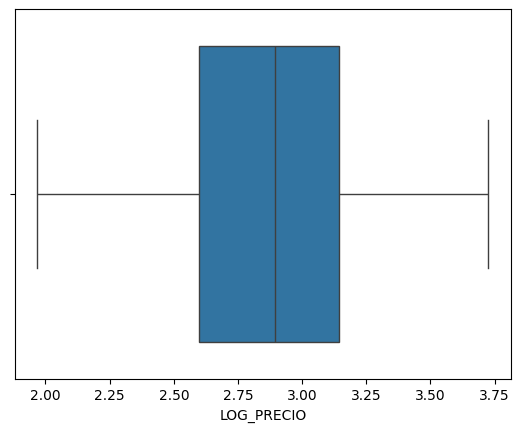

In [76]:
sns.boxplot(x=df_seguro3["LOG_PRECIO"])

In [77]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


In [ ]:
'''7.3 TARGET VS VARIABLES INDEPENDIENTES'''

<Axes: xlabel='SEXO_BOOL', ylabel='PRECIO'>

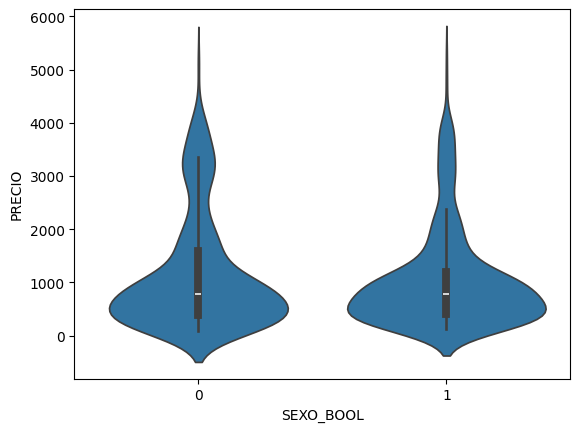

In [78]:
sns.violinplot(x="SEXO_BOOL",y="PRECIO",data=df_seguro3)
#el sexo influye muy poco en el precio

<Axes: xlabel='FUMADOR_BOOL', ylabel='PRECIO'>

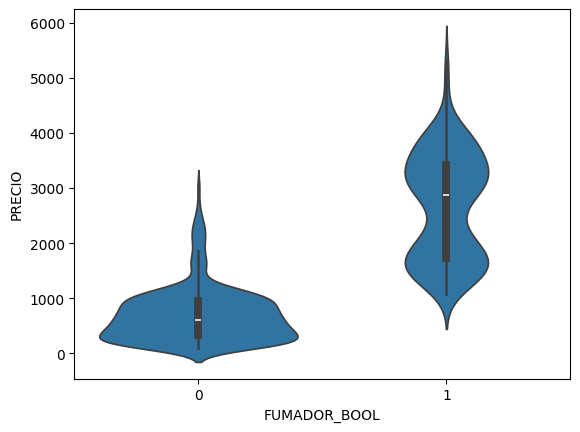

In [79]:
sns.violinplot(x="FUMADOR_BOOL", y = "PRECIO", data=df_seguro3)

<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

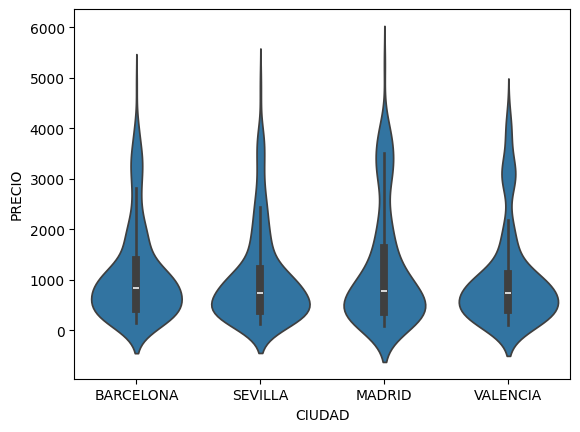

In [82]:
sns.violinplot(x="CIUDAD", y = "PRECIO", data=df_seguro3)
#por ciudad no hay diferencia

<Axes: xlabel='EDAD', ylabel='PRECIO'>

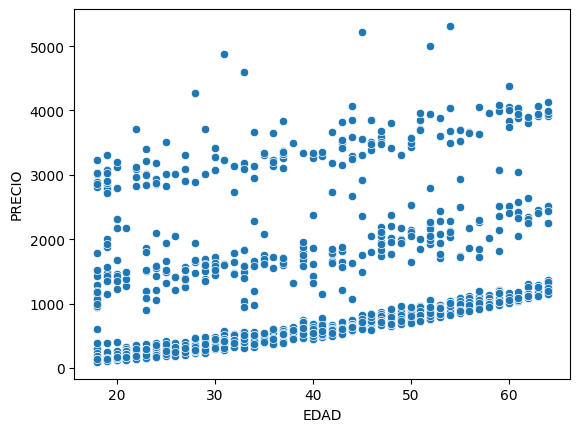

In [83]:
#si tenemos muchas categorias en mejor un gráfico de puntos
sns.scatterplot(x="EDAD", y = "PRECIO", data=df_seguro3)
#hay franjas por las demás variables

<Axes: xlabel='EDAD', ylabel='PRECIO'>

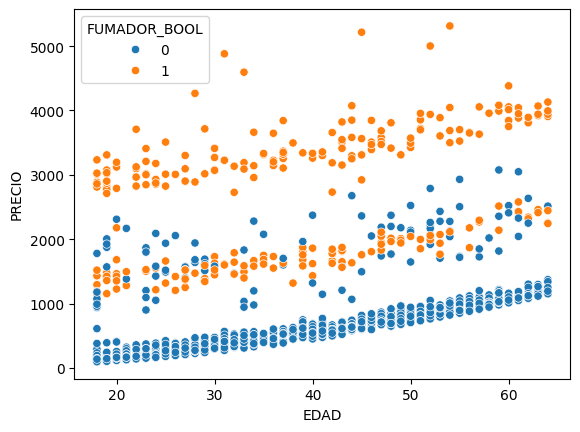

In [85]:
#si tenemos muchas categorias en mejor un gráfico de puntos
sns.scatterplot(x="EDAD", y = "PRECIO", hue="FUMADOR_BOOL", data=df_seguro3)

In [ ]:
'''7.4 REESCALAR VARIABLES'''

In [ ]:
'''
Nuestro objetivo es predecir el precio del seguro médico, vamos a utilizar las siguientes estrategias
Label Encoding
One Hot Encoding
Min max scaling
'''